In [2]:
%pwd

'c:\\Users\\USER\\DataScience\\Projects\\End-To-End-Mushroom-with-MLFLOW\\notebook'

# Mushroom Prediction Project
Life cycle of Machine learning Project

1. Understanding the Problem Statement
2. Data Collection
3. Exploratory data analysis
4. Data Cleaning
5. Data Pre-Processing
6. Model Training
7. Choose best model



## About

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one.  The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

## 1) Problem statement

This project predicts wheather the mushroom class is edible or poisonous.

## 2) Data Collection.

Dataset: https://archive.ics.uci.edu/dataset/73/mushroom

|Dataset Characterstics|Subject Area| Associated Task|
|---|---|---|
|Multivariate|Biology|Classification|


|Feature Type|# Instances| # Features|
|---|---|---|
|Categorical|8124|23|

### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv('mushrooms.csv')

# top 5 records
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Shape of the dataset

In [5]:
df.shape

(8124, 23)

### Summary of the dataset

In [6]:
# Display summary statistics for a dataframe
df.describe(include="all")


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Check Datatypes in the dataset

## 3. Data Checks to perform

- Check for null values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column


### 3.1 Check for null values

In [7]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

- There are no missing values in the data set

In [8]:
# Check for Null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [10]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))



We have 23 categorical features : ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [11]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

class
e    51.797144
p    48.202856
Name: proportion, dtype: float64
---------------------------
cap-shape
x    45.002462
f    38.798621
k    10.192024
b     5.563762
s     0.393895
c     0.049237
Name: proportion, dtype: float64
---------------------------
cap-surface
y    39.931068
s    31.462334
f    28.557361
g     0.049237
Name: proportion, dtype: float64
---------------------------
cap-color
n    28.114229
g    22.648941
e    18.463811
y    13.195470
w    12.801576
b     2.067947
p     1.772526
c     0.541605
u     0.196947
r     0.196947
Name: proportion, dtype: float64
---------------------------
bruises
f    58.444116
t    41.555884
Name: proportion, dtype: float64
---------------------------
odor
n    43.426883
f    26.587888
y     7.090103
s     7.090103
a     4.923683
l     4.923683
p     3.151157
c     2.363368
m     0.443131
Name: proportion, dtype: float64
---------------------------
gill-attachment
f    97.415066
a     2.584934
Name: proportion, dtype: float64
---------

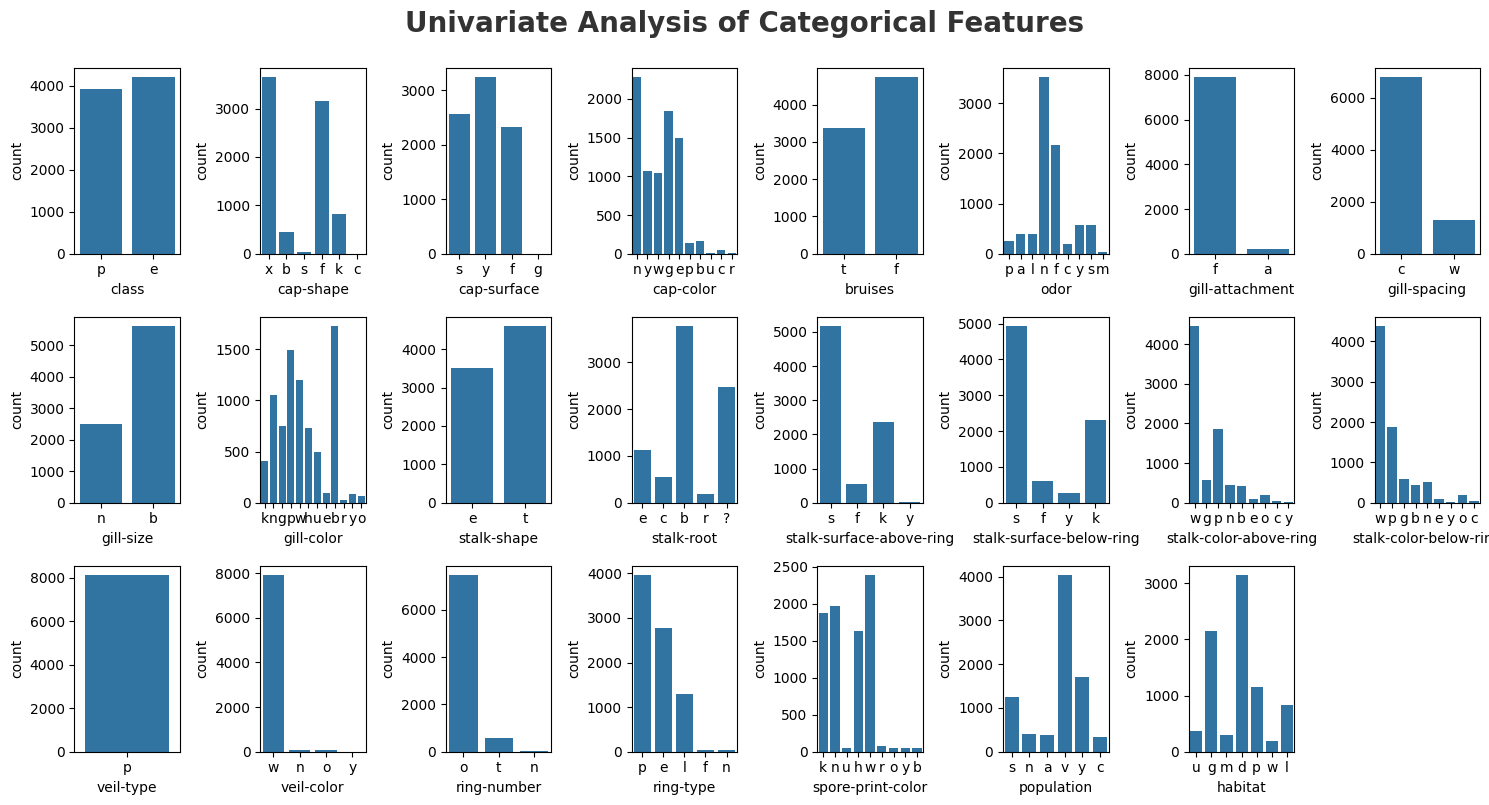

In [12]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 8, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()


## Check Multicollinearity for Categorical features

In [13]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['class'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append("Fail to Reject Null Hypothesis")

result = pd.DataFrame(data=[categorical_features, chi2_test]).T 
result.columns = ['Column', 'Hypothesis Result']
result


,Column,Hypothesis Result
0,class,Reject Null Hypothesis
1,cap-shape,Reject Null Hypothesis
2,cap-surface,Reject Null Hypothesis
3,cap-color,Reject Null Hypothesis
4,bruises,Reject Null Hypothesis
5,odor,Reject Null Hypothesis
6,gill-attachment,Reject Null Hypothesis
7,gill-spacing,Reject Null Hypothesis
8,gill-size,Reject Null Hypothesis
9,gill-color,Reject Null Hypothesis


**Insights**

- Here veil-type fails to Rejects Null Hypothesis which means it doesn't correlate with target column.



## 4. Visualization
### 4.1 Visualize the Target Feature

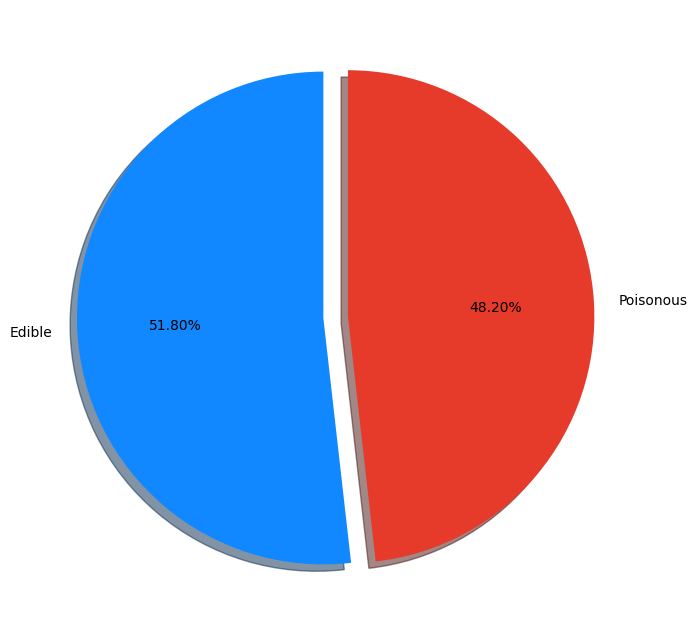

In [14]:
percentage = df['class'].value_counts(normalize=True) * 100

labels = ["Edible","Poisonous"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
        autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

- From the chart it is seen that the Target Variable is almost balanced - no need to use balance technique such as SMOTE.

#### 4.2 Does cap-shape has any impact on class type?

In [24]:
#group data by cap-shape and their count of class
df.groupby('cap-shape')['class'].value_counts(normalize=True).to_frame()*100

proportion
cap-shape class            
b         e       89.380531
          p       10.619469
c         p      100.000000
f         e       50.634518
          p       49.365482
k         p       72.463768
          e       27.536232
s         e      100.000000
x         e       53.282276
          p       46.717724

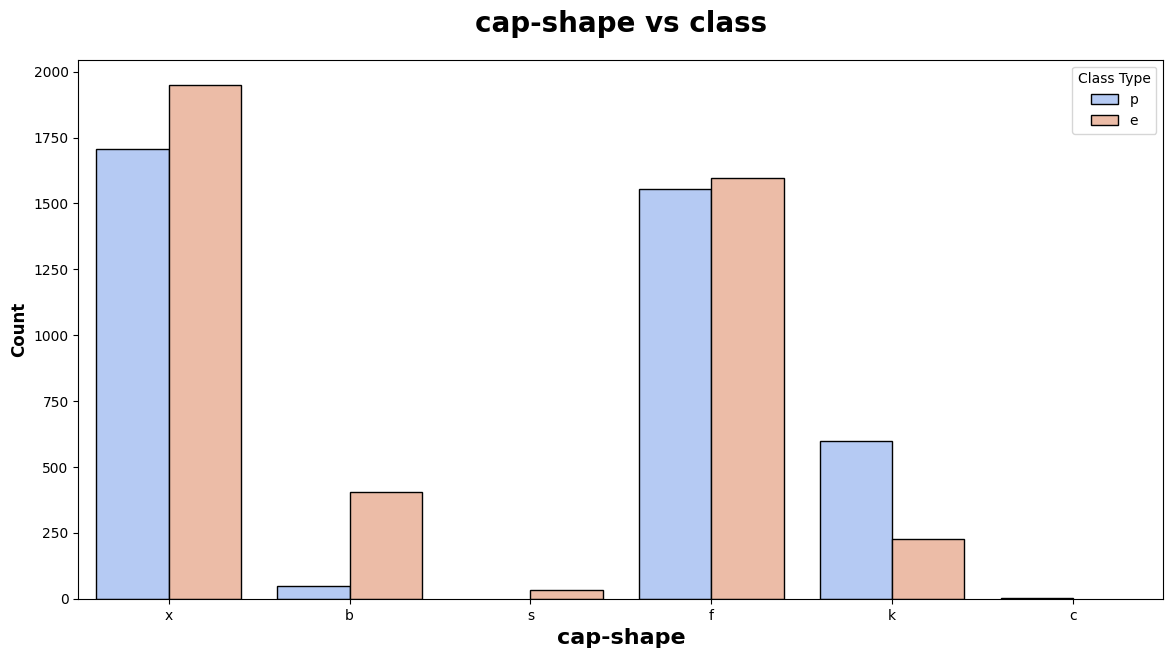

In [25]:
plt.subplots(figsize=(14,7))

sns.countplot(x="cap-shape",hue="class", data=df, ec = "black",palette="coolwarm")
plt.title("cap-shape vs class", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("cap-shape", weight="bold", fontsize=16)
plt.legend(title="Class Type", fancybox=True)
plt.show()

In [26]:
df2 = df.copy()

posx and posy should be finite values
posx and posy should be finite values


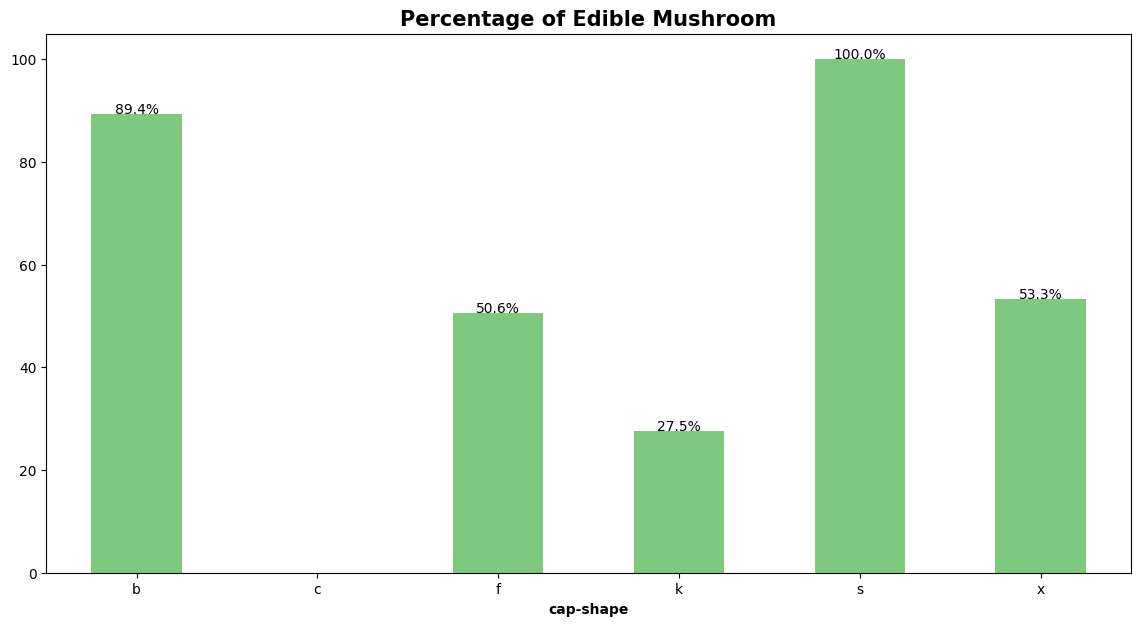

In [27]:
plt.figure(figsize=[14,7])

(100*df2[df2["class"].isin(['e'])]['cap-shape'].value_counts()/df2['cap-shape'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Edible Mushroom" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["class"].isin(['e'])]['cap-shape'].value_counts()/df2['cap-shape'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('cap-shape' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

#### Insights:
- "x" cap-shape mushroom are more edible and poisonous compared to other cap-shape mushroom. 
- "c" cap-shape mushroom can be 100% poisonous.
- "s" cap-shape mushroom can be 100% edible.

#### 4.3 Does cap-color mushroom has any impact on Class type ?

In [29]:
#group data by cap-shape and their count of class
df.groupby('cap-color')['class'].value_counts(normalize=True).to_frame()*100

proportion
cap-color class            
b         p       71.428571
          e       28.571429
c         e       72.727273
          p       27.272727
e         p       58.400000
          e       41.600000
g         e       56.086957
          p       43.913043
n         e       55.341506
          p       44.658494
p         p       61.111111
          e       38.888889
r         e      100.000000
u         e      100.000000
w         e       69.230769
          p       30.769231
y         p       62.686567
          e       37.313433

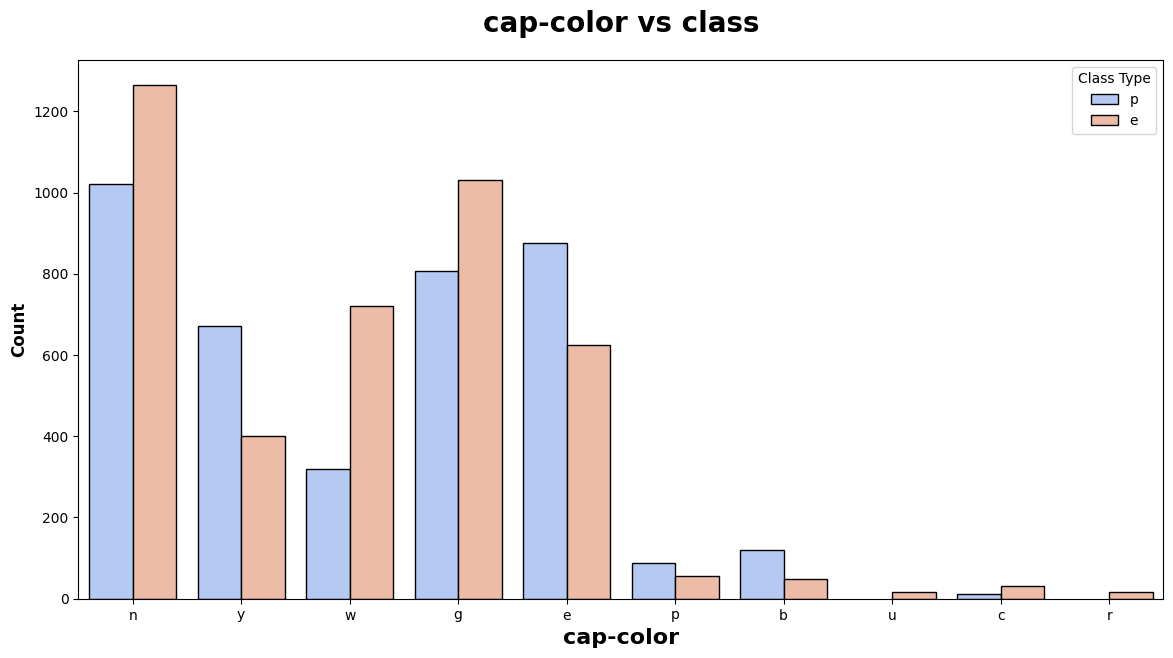

In [30]:
plt.subplots(figsize=(14,7))

sns.countplot(x="cap-color",hue="class", data=df, ec = "black",palette="coolwarm")
plt.title("cap-color vs class", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("cap-color", weight="bold", fontsize=16)
plt.legend(title="Class Type", fancybox=True)
plt.show()

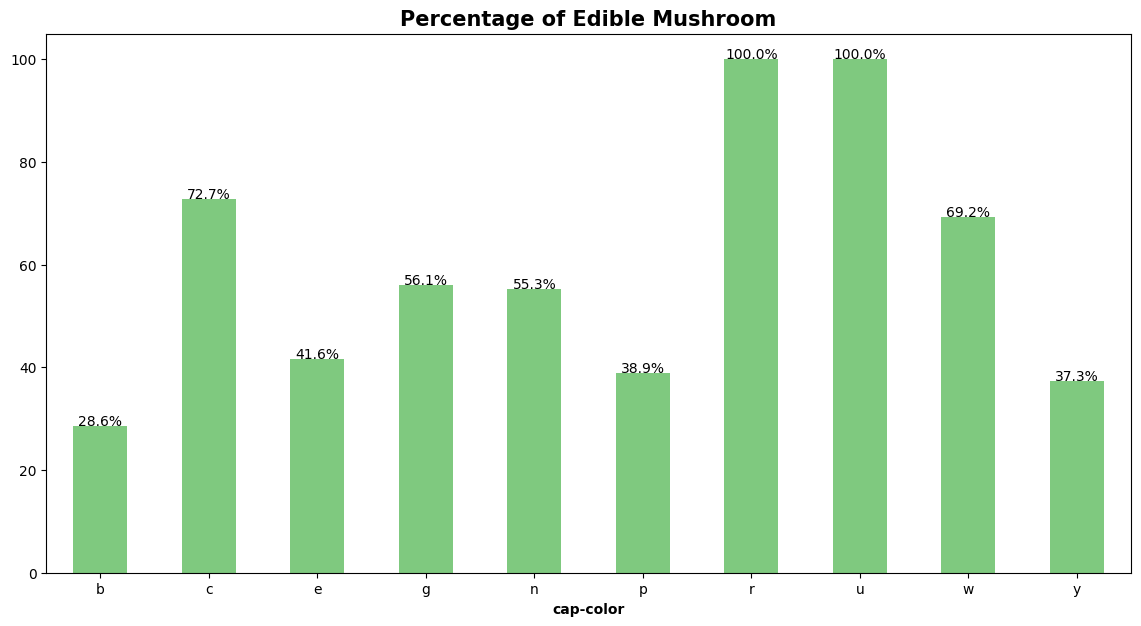

In [32]:
plt.figure(figsize=[14,7])

(100*df2[df2["class"].isin(['e'])]['cap-color'].value_counts()/df2['cap-color'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Edible Mushroom" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["class"].isin(['e'])]['cap-color'].value_counts()/df2['cap-color'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('cap-color' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

#### Insight
- "n" and "r" type cap-color mushroom are 100% edible.


#### 4.3 Does odor of a mushroom has any impact on Class type ?

In [34]:
#group data by cap-shape and their count of class
df.groupby('ring-type')['class'].value_counts(normalize=True).to_frame()*100

proportion
ring-type class            
e         p       63.688761
          e       36.311239
f         e      100.000000
l         p      100.000000
n         p      100.000000
p         e       79.435484
          p       20.564516

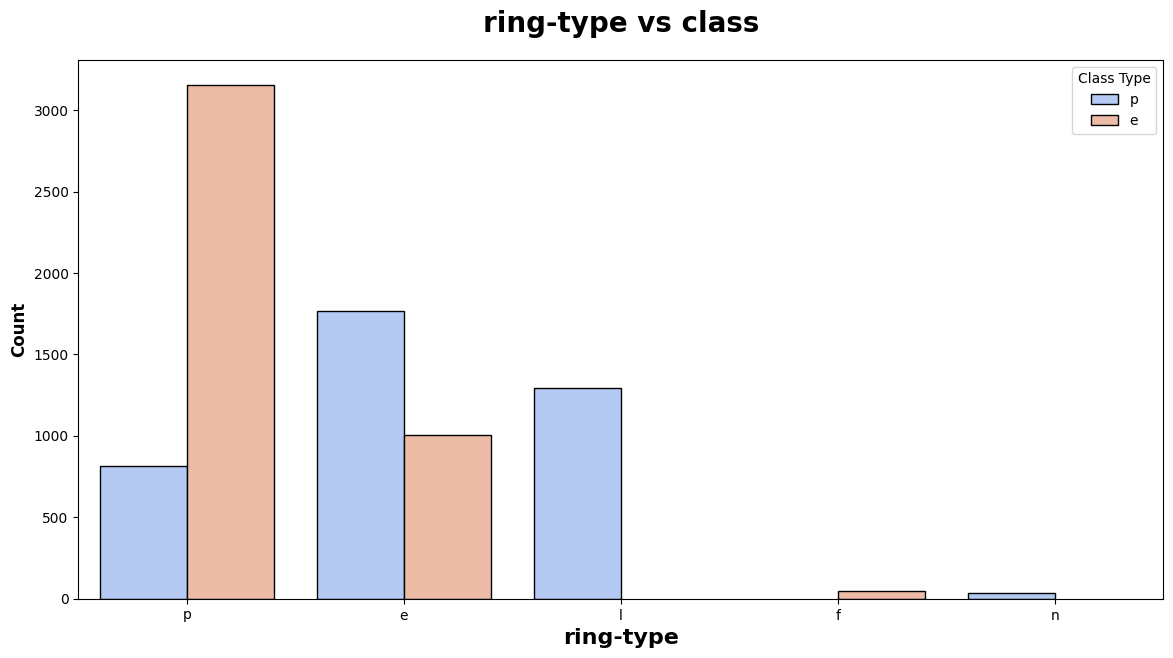

In [35]:
plt.subplots(figsize=(14,7))

sns.countplot(x="ring-type",hue="class", data=df, ec = "black",palette="coolwarm")
plt.title("ring-type vs class", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("ring-type", weight="bold", fontsize=16)
plt.legend(title="Class Type", fancybox=True)
plt.show()

#### Insights
- "f" ring-type can be 100% edible.
- "I" and "n" ring-type are 100% poisonous.